In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

# Load the Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Preprocess the data
train_images = train_images.reshape((60000, 28, 28, 1)) / 255.0
test_images = test_images.reshape((10000, 28, 28, 1)) / 255.0

train_labels = to_c
ategorical(train_labels)
test_labels = to_categorical(test_labels)

# Create a simple CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=64)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")


C:\Users\ninad\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


4422102/4422102 [==============================] - 8s 2us/step
Epoch 1/5
938/938 [==============================] - 24s 22ms/step - loss: 0.5467 - accuracy: 0.7985
Epoch 2/5
938/938 [==============================] - 21s 22ms/step - loss: 0.3411 - accuracy: 0.8766
Epoch 3/5
938/938 [==============================] - 21s 23ms/step - loss: 0.2911 - accuracy: 0.8931
Epoch 4/5
938/938 [==============================] - 21s 23ms/step - loss: 0.2627 - accuracy: 0.9041
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.2862 - accuracy: 0.8948
Test accuracy: 0.8948000073432922


In [2]:
import numpy as np
from tensorflow.keras.datasets import fashion_mnist

# Load the Fashion MNIST dataset
_, (test_images, test_labels) = fashion_mnist.load_data()

# Preprocess the data
test_images = test_images.reshape((10000, 28, 28, 1)) / 255.0

# Assuming 'model' is your trained CNN model
predictions = model.predict(test_images)

# Get predicted labels (classes) for each image
predicted_labels = np.argmax(predictions, axis=1)

true_labels = test_labels  # Assuming test_labels are the true labels
accuracy = np.mean(predicted_labels == true_labels)
print(f"Test accuracy: {accuracy}")


313/313 [==============================] - 1s 3ms/step
Test accuracy: 0.8948


313/313 [==============================] - 1s 3ms/step


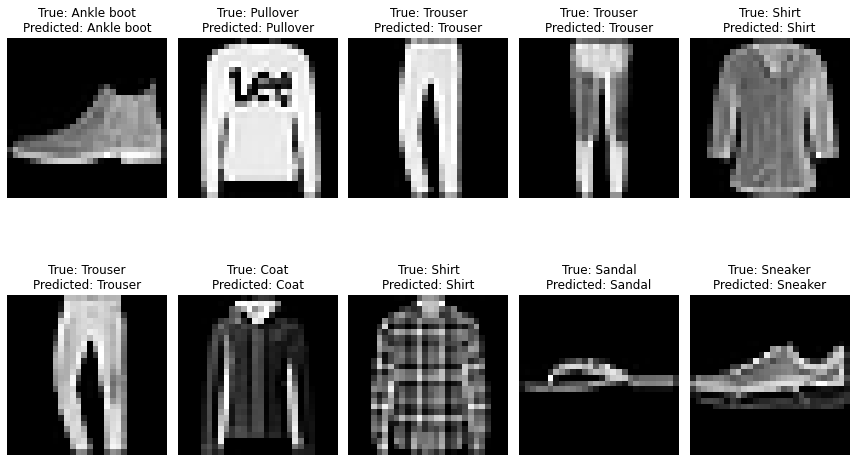

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

# Load the Fashion MNIST dataset
(_, _), (test_images, test_labels) = fashion_mnist.load_data()

# Preprocess the data
test_images = test_images.reshape((10000, 28, 28, 1)) / 255.0

# Make predictions
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

# Define class names for Fashion MNIST
class_names = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]

# Display a few test images along with their predicted labels
num_images = 10  # Number of images to display
plt.figure(figsize=(12, 8))
for i in range(num_images):
    plt.subplot(2, num_images // 2, i + 1)
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {class_names[test_labels[i]]}\nPredicted: {class_names[predicted_labels[i]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()
